In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('crop_recommendation_dataset.csv')
df.head()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
0,20.879744,82.002744,202.935536,6.502985,69.30,79.50000,94.4400,0.63,Loamy Soil,rice
1,21.770462,80.319644,226.655537,7.038096,72.02,141.82400,141.6978,1.40,Loamy Soil,rice
2,23.004459,82.320763,263.964248,7.633568,77.77,59.39000,81.8900,1.80,Peaty Soil,rice
3,26.491096,80.283629,242.864034,6.980401,78.65,147.45895,142.9430,1.43,Loamy Soil,rice
4,20.280071,81.604873,262.717340,7.628473,73.98,68.95000,95.7400,1.75,Peaty Soil,rice


In [3]:
def fertilizer_dependency(row):
    high_count = 0

    if row['Nitrogen'] > 65:
        high_count += 1
    if row['Phosphorous'] > 82:
        high_count += 1
    if row['Potassium'] > 75:
        high_count += 1

    if high_count >= 2:
        return "Highly Dependent"
    else:
        return "Low Dependent"

df['Fertilizer_Dependency'] = df.apply(fertilizer_dependency, axis=1)

In [4]:
df

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer_Dependency
0,20.879744,82.002744,202.935536,6.502985,69.3000,79.50000,94.4400,0.63,Loamy Soil,rice,Highly Dependent
1,21.770462,80.319644,226.655537,7.038096,72.0200,141.82400,141.6978,1.40,Loamy Soil,rice,Highly Dependent
2,23.004459,82.320763,263.964248,7.633568,77.7700,59.39000,81.8900,1.80,Peaty Soil,rice,Highly Dependent
3,26.491096,80.283629,242.864034,6.980401,78.6500,147.45895,142.9430,1.43,Loamy Soil,rice,Highly Dependent
4,20.280071,81.604873,262.717340,7.628473,73.9800,68.95000,95.7400,1.75,Peaty Soil,rice,Highly Dependent
...,...,...,...,...,...,...,...,...,...,...,...
3095,25.287846,89.636679,58.286977,6.765095,57.3400,144.48000,73.0800,1.64,Neutral Soil,watermelon,Low Dependent
3096,26.638386,84.695469,48.324286,6.189214,56.0600,61.34000,47.9500,1.35,Peaty Soil,watermelon,Low Dependent
3097,25.331045,84.305338,41.532187,6.904242,54.9395,145.53795,97.8300,1.58,Neutral Soil,watermelon,Highly Dependent
3098,26.820601,83.892415,43.971937,6.463271,55.5100,76.89000,50.9200,0.68,Acidic Soil,watermelon,Low Dependent


In [5]:
df['Fertilizer_Dependency'].value_counts()

Fertilizer_Dependency
Low Dependent       2424
Highly Dependent     676
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['Fertilizer_Dependency'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Highly Dependent': np.int64(0), 'Low Dependent': np.int64(1)}


In [7]:
df[:12]

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer_Dependency,target
0,20.879744,82.002744,202.935536,6.502985,69.30,79.50000,94.44000,0.63,Loamy Soil,rice,Highly Dependent,0
1,21.770462,80.319644,226.655537,7.038096,72.02,141.82400,141.69780,1.40,Loamy Soil,rice,Highly Dependent,0
2,23.004459,82.320763,263.964248,7.633568,77.77,59.39000,81.89000,1.80,Peaty Soil,rice,Highly Dependent,0
3,26.491096,80.283629,242.864034,6.980401,78.65,147.45895,142.94300,1.43,Loamy Soil,rice,Highly Dependent,0
4,20.280071,81.604873,262.717340,7.628473,73.98,68.95000,95.74000,1.75,Peaty Soil,rice,Highly Dependent,0
5,23.058049,83.370118,251.055000,7.073454,76.81,140.93673,140.60768,0.86,Loamy Soil,rice,Highly Dependent,0
6,22.708838,82.639414,271.324860,5.700806,78.29,49.08000,67.85000,1.78,Peaty Soil,rice,Low Dependent,1
7,20.280071,82.894086,241.974195,5.718627,72.60,49.41000,65.18000,2.32,Peaty Soil,rice,Low Dependent,1
8,24.515881,83.535216,230.446236,6.685346,76.22,109.64000,137.65000,2.34,Loamy Soil,rice,Highly Dependent,0
9,23.223974,83.033227,221.209196,6.336254,73.70,67.53000,84.44000,2.37,Peaty Soil,rice,Highly Dependent,0


In [8]:
X = df[['Nitrogen', 'Phosphorous', 'Potassium']]
y = df['target']


In [9]:
X

,Nitrogen,Phosphorous,Potassium
0,69.3000,79.50000,94.4400
1,72.0200,141.82400,141.6978
2,77.7700,59.39000,81.8900
3,78.6500,147.45895,142.9430
4,73.9800,68.95000,95.7400
...,...,...,...
3095,57.3400,144.48000,73.0800
3096,56.0600,61.34000,47.9500
3097,54.9395,145.53795,97.8300
3098,55.5100,76.89000,50.9200


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
}

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
results_df = results_df.sort_values(by='best_score', ascending=False)

results_df

,model,best_score,best_params
1,random_forest,0.993872,{'n_estimators': 150}
2,knn,0.978390,"{'n_neighbors': 3, 'weights': 'uniform'}"
0,svm,0.944190,"{'C': 1, 'kernel': 'linear'}"


In [12]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [31]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[146,   0],
       [  0, 474]])

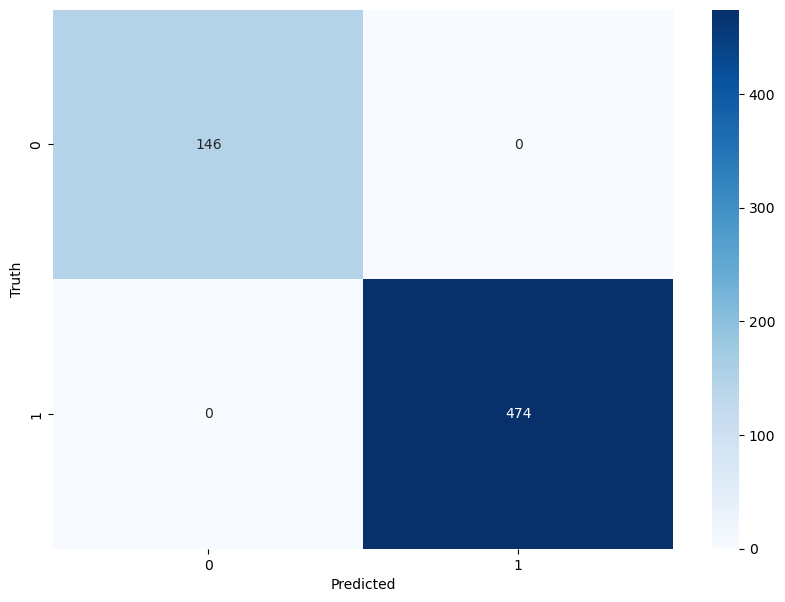

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       474

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620



In [40]:
sample = [[30, 100, 140]]  # N low, P & K high
print("Prediction:", model.predict(sample))  
# Prediction: [0] represent high dependency

Prediction: [0]


C:\Users\PRO\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import pickle
with open('model-2.pkl','wb') as file:
    pickle.dump(model,file)

In [19]:
with open('model-2.pkl','rb') as file:
    mp=pickle.load(file)